In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model



In [3]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

file = list(uploaded.keys())[0]
with zipfile.ZipFile(file, 'r') as ref:
    ref.extractall('/content/dataset')

os.listdir('/content/dataset')

Saving realKnownCause.zip to realKnownCause.zip


['realKnownCause']

In [4]:
df1 = pd.read_csv('/content/dataset/realKnownCause/ambient_temperature_system_failure.csv')

In [12]:
df2 = pd.read_csv('/content/dataset/realKnownCause/cpu_utilization_asg_misconfiguration.csv')

In [11]:
df3 = pd.read_csv('/content/dataset/realKnownCause/ec2_request_latency_system_failure.csv')

In [19]:
df1

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


In [21]:
df2

,timestamp,value
0,2014-05-14 01:14:00,85.835
1,2014-05-14 01:19:00,88.167
2,2014-05-14 01:24:00,44.595
3,2014-05-14 01:29:00,56.282
4,2014-05-14 01:34:00,36.534
...,...,...
18045,2014-07-15 16:59:00,13.498
18046,2014-07-15 17:04:00,19.831
18047,2014-07-15 17:09:00,27.165
18048,2014-07-15 17:14:00,12.873


In [22]:
df3

,timestamp,value
0,2014-03-07 03:41:00,45.868
1,2014-03-07 03:46:00,47.606
2,2014-03-07 03:51:00,42.580
3,2014-03-07 03:56:00,46.030
4,2014-03-07 04:01:00,44.992
...,...,...
4027,2014-03-21 03:21:00,25.352
4028,2014-03-21 03:26:00,38.216
4029,2014-03-21 03:31:00,22.864
4030,2014-03-21 03:36:00,66.260


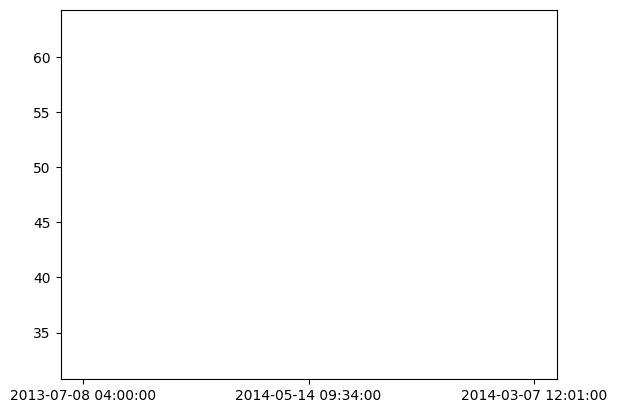

In [20]:
plt.plot(df1['timestamp'][100], df1['value'][100])
plt.plot(df2['timestamp'][100], df2['value'][100])
plt.plot(df3['timestamp'][100], df3['value'][100])

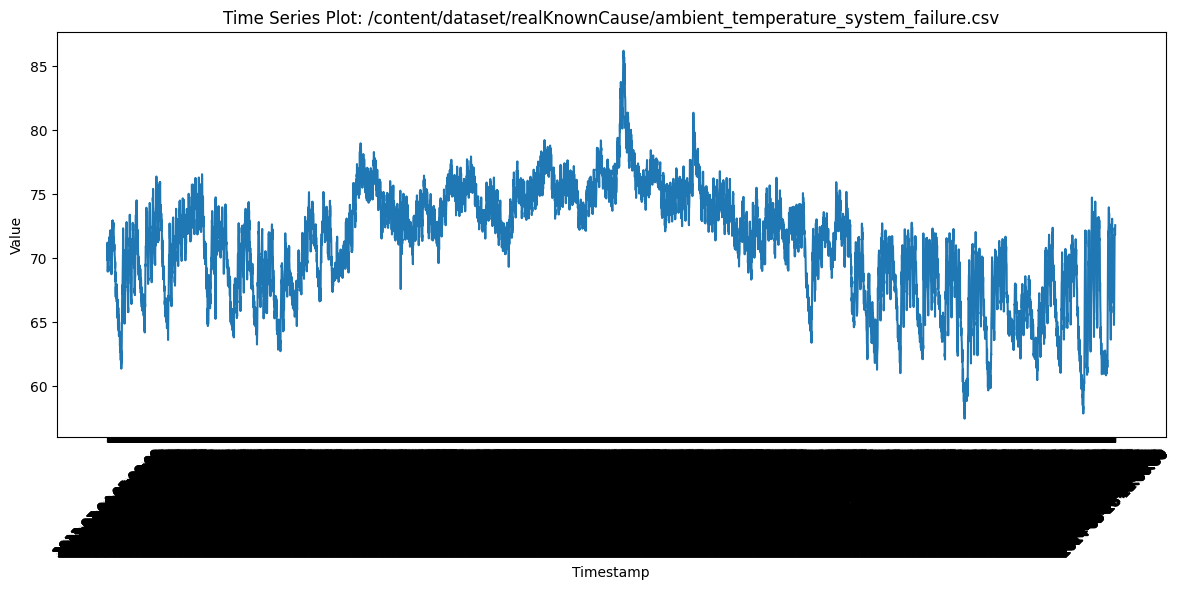

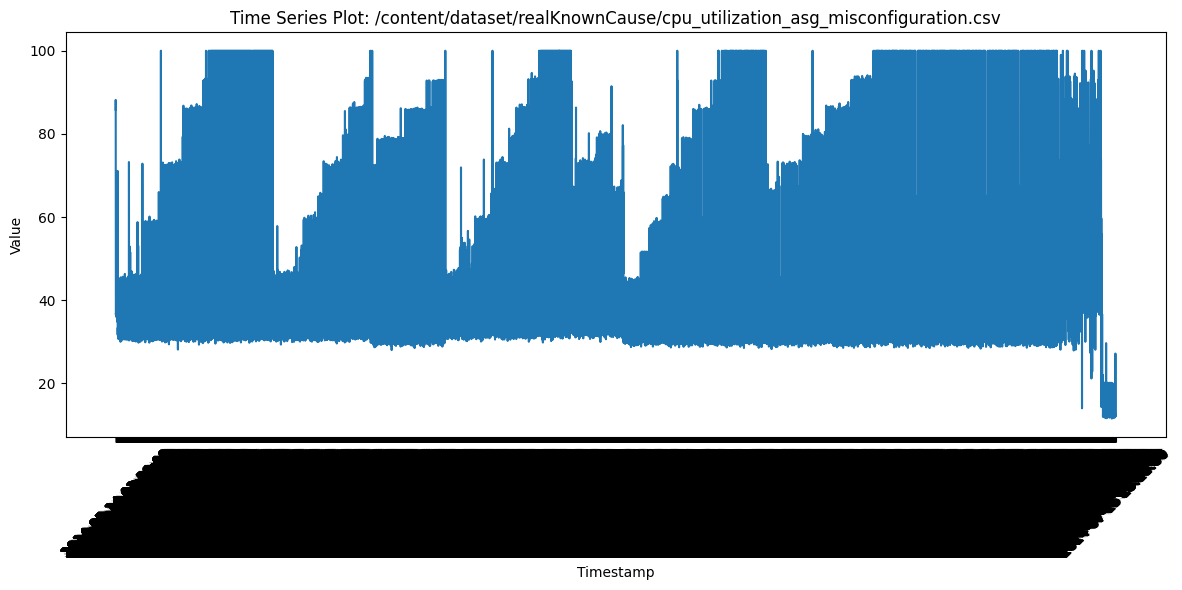

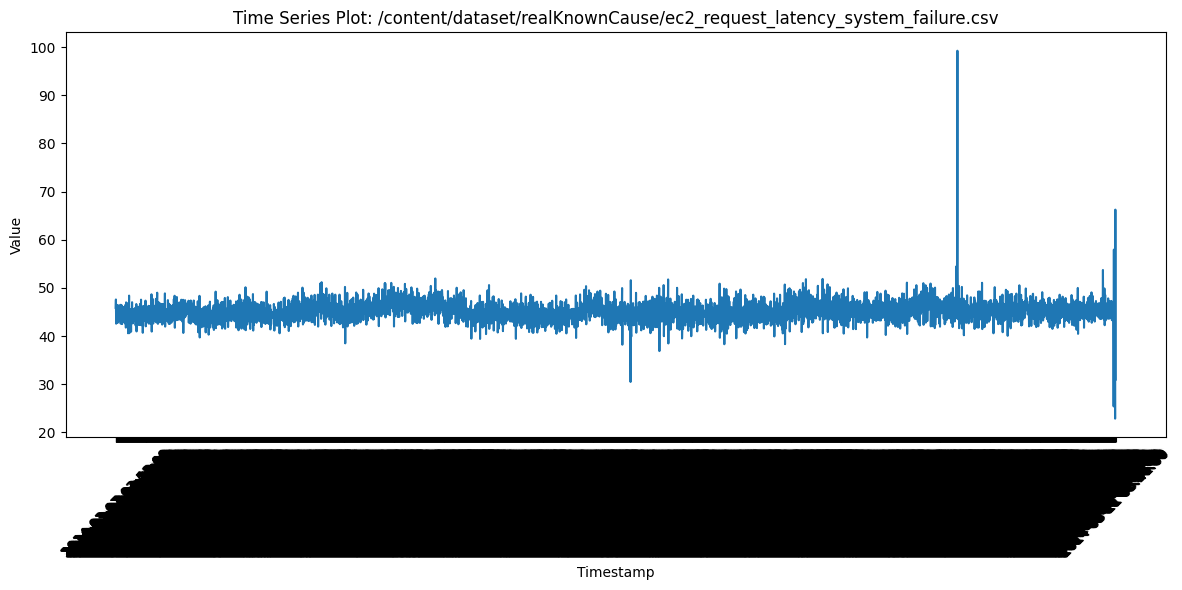

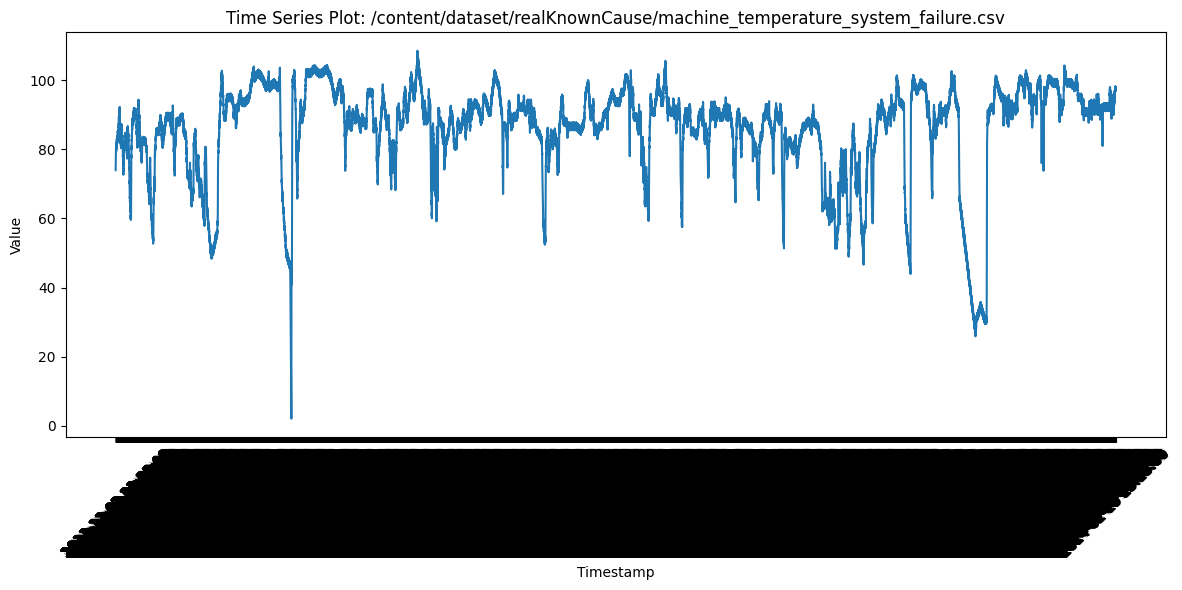

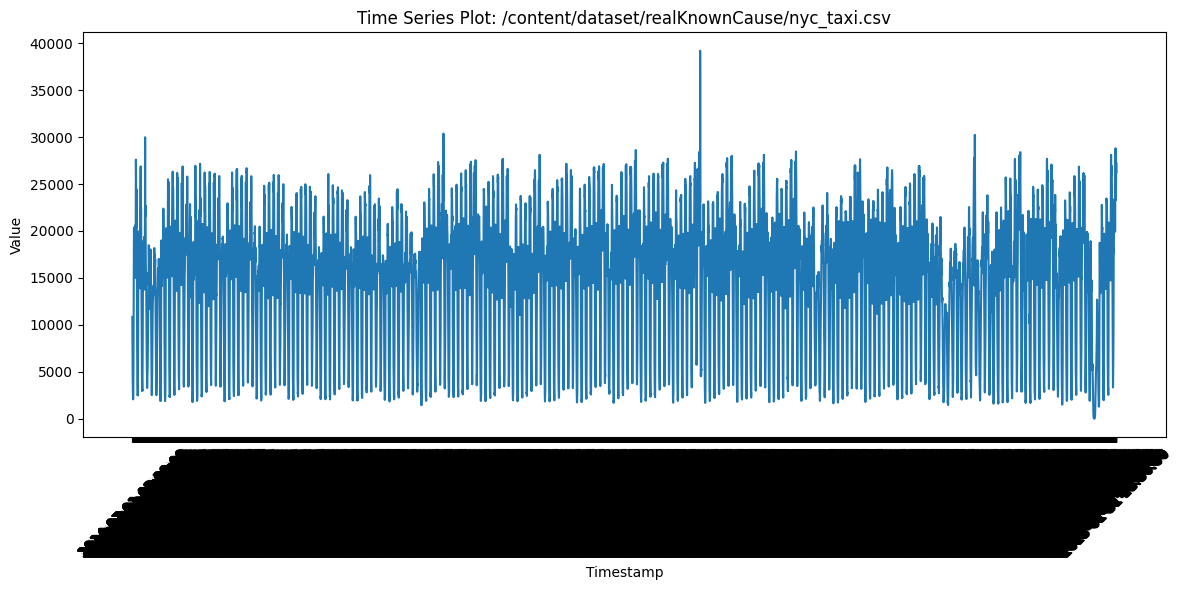

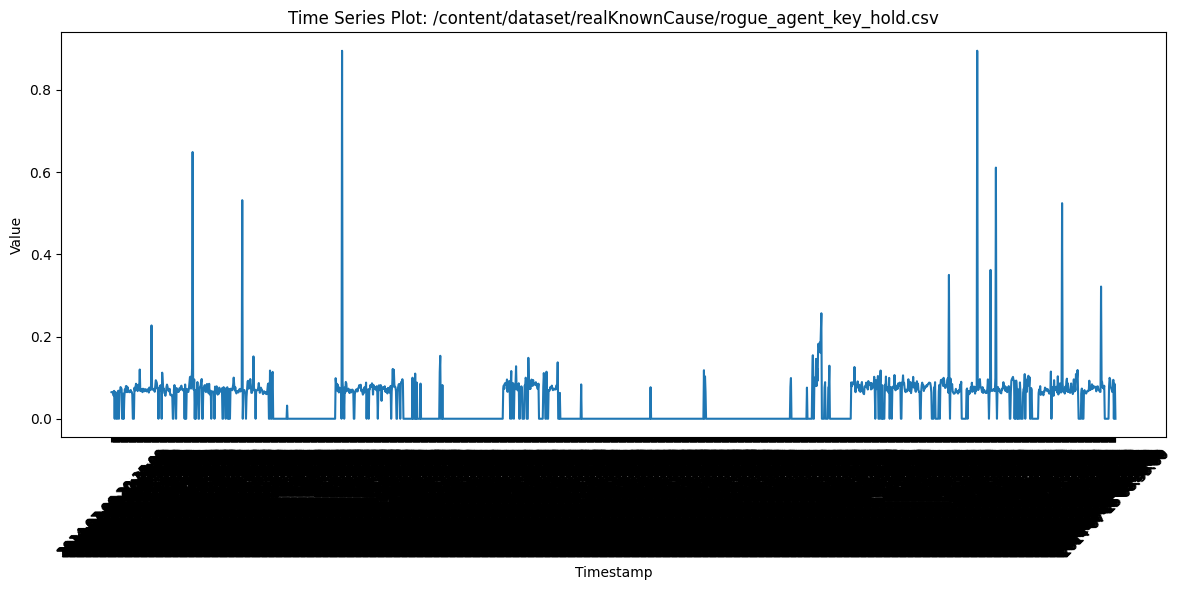

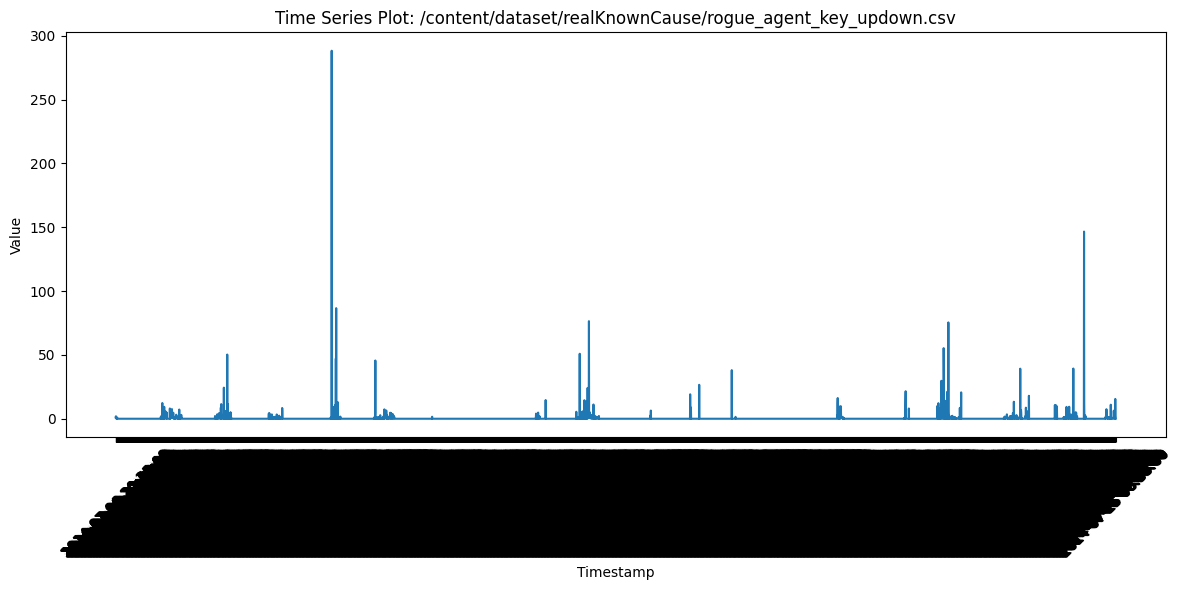

In [24]:
def plot_timeseries(file_name):
    df = pd.read_csv(file_name)
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['value'])
    plt.title(f'Time Series Plot: {file_name}')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

files = [
    '/content/dataset/realKnownCause/ambient_temperature_system_failure.csv',
    '/content/dataset/realKnownCause/cpu_utilization_asg_misconfiguration.csv',
    '/content/dataset/realKnownCause/ec2_request_latency_system_failure.csv',
    '/content/dataset/realKnownCause/machine_temperature_system_failure.csv',
    '/content/dataset/realKnownCause/nyc_taxi.csv',
    '/content/dataset/realKnownCause/rogue_agent_key_hold.csv',
    '/content/dataset/realKnownCause/rogue_agent_key_updown.csv'
]

for file in files:
    plot_timeseries(file)

In [25]:
def preprocess_data(df, seq_length=50):
    # Normalize time
    df['normalized_time'] = (df['timestamp'] - df['timestamp'].min()) / (df['timestamp'].max() - df['timestamp'].min())

    # Add time features
    df['hour_sin'] = np.sin(2 * np.pi * df['timestamp'].dt.hour / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['timestamp'].dt.hour / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['timestamp'].dt.dayofweek / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['timestamp'].dt.dayofweek / 7)

    # Normalize value
    scaler = MinMaxScaler()
    df['normalized_value'] = scaler.fit_transform(df[['value']])

    # Create sequences
    sequences = []
    for i in range(len(df) - seq_length + 1):
        seq = df[['normalized_value', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos']].iloc[i:i+seq_length].values
        sequences.append(seq)

    return np.array(sequences), scaler

# Preprocess each dataset
processed_data = [preprocess_data(df) for df in dataframes]

NameError: name 'dataframes' is not defined